In [16]:
!pip install tensorflow

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from keras.utils import PyDataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#define image size and batch size
IMG_SIZE=224
BATCH_SIZE=32

In [2]:
tarin_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator =tarin_datagen.flow_from_directory(
    r'C:\Users\aryah\Downloads\Train-20240627T045858Z-001\Train',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
    )  
val_generator =tarin_datagen.flow_from_directory(
    r'C:\Users\aryah\Downloads\Train-20240627T045858Z-001\Train',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
    )  

Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [4]:
model = keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(1,activation='sigmoid'),
])   

In [5]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
model.fit(train_generator,validation_data=val_generator,epochs=5)

Epoch 1/5


C:\Users\aryah\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.7290 - loss: 0.7453 - val_accuracy: 0.8983 - val_loss: 0.3031
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9213 - loss: 0.2229 - val_accuracy: 0.9433 - val_loss: 0.1411
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.9466 - loss: 0.1323 - val_accuracy: 0.9867 - val_loss: 0.0561
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.9865 - loss: 0.0586 - val_accuracy: 0.9817 - val_loss: 0.0515
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.9917 - loss: 0.0329 - val_accuracy: 0.9900 - val_loss: 0.0290


In [7]:
model.save("Model.h5")

In [8]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
model=load_model('Model.h5')
print("Model Loaded")

Model Loaded


In [14]:
test_image_path=r"C:\Users\aryah\Downloads\Train-20240627T045858Z-001\Train\yes\y981.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)

In [15]:
img_array/=255.
prediction=model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[0.95265603]]


In [18]:
if prediction<0.5:
    print("Prediction No Tumor (Probability:",prediction[0][0])
else:
    print("Prediction:Tumor present (Probability:",prediction[0][0])

Prediction:Tumor present (Probability: 0.95265603


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    r'C:\Users\aryah\Downloads\RGB\Train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)  
val_generator = train_datagen.flow_from_directory(
    r'C:\Users\aryah\Downloads\RGB\Train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax'),  # Changed to 3 units for 3 classes
])

# Compile and train the model (you need to add this part)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_generator, validation_data=val_generator, epochs=10)

model.save("Model1.h5")

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

model = load_model('Model1.h5')
print("Model Loaded")

test_image_path = r'C:\Users\aryah\Downloads\RGB\Train\green\green6.jpg'
img = image.load_img(test_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

prediction = model.predict(img_array)
print(prediction)

class_names = ['Blue', 'Red', 'Green']  # Make sure this order matches your directory structure
predicted_class = np.argmax(prediction[0])
probability = prediction[0][predicted_class]

print(f"Prediction: It is {class_names[predicted_class]} (Probability: {probability:.2f})")

Found 36 images belonging to 3 classes.
Found 6 images belonging to 3 classes.
Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 596ms/step - accuracy: 0.3947 - loss: 1.1931 - val_accuracy: 0.6667 - val_loss: 3.2758
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step - accuracy: 0.5394 - loss: 2.9310 - val_accuracy: 1.0000 - val_loss: 0.0697
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - accuracy: 0.9711 - loss: 0.0921 - val_accuracy: 1.0000 - val_loss: 3.2689e-04
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step - accuracy: 0.9132 - loss: 0.5151 - val_accuracy: 1.0000 - val_loss: 7.9621e-05
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step - accuracy: 0.9444 - loss: 0.1591 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step - accuracy: 0.9711 - loss: 0.0514 - val_accuracy: 0.8333 - val_loss: 0.1863
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step - accuracy: 0.9630 - loss: 0.1899 - val_accuracy: 1.0000 - val_loss: 0.0090
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━

Model Loaded
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
[[5.2896381e-04 9.9927586e-01 1.9518296e-04]]
Prediction: It is Red (Probability: 1.00)


In [51]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
IMG_SIZE = 224
BATCH_SIZE = 32
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    r'C:\Users\aryah\Downloads\RGB\Train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    r'C:\Users\aryah\Downloads\RGB\Train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

classes = list(train_generator.class_indices)
print(classes)

Found 36 images belonging to 3 classes.
Found 6 images belonging to 3 classes.
['blue', 'green', 'red']


In [19]:
model = keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(3, activation='softmax')
]) 

In [20]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.fit(train_generator,validation_data=val_generator,epochs=5)

Epoch 1/5


C:\Users\aryah\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.3889 - loss: 2.8384 - val_accuracy: 0.3333 - val_loss: 1.0639
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.6944 - loss: 0.8178 - val_accuracy: 1.0000 - val_loss: 0.2104
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.8889 - loss: 0.3242 - val_accuracy: 0.8333 - val_loss: 0.2524
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.8611 - loss: 0.2557 - val_accuracy: 1.0000 - val_loss: 0.0589
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 1.0000 - loss: 0.0665 - val_accuracy: 1.0000 - val_loss: 0.0020


In [22]:
model.save("Model0.h5")

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
model=load_model('Model0.h5')
print("Model Loaded")

Model Loaded


In [53]:
test_image_path=r'C:\Users\aryah\Downloads\RGB\Train\red\red1.jpg'
img=image.load_img(test_image_path,target_size=(224,224))
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)

In [55]:
img_array/=255.
prediction=model.predict(img_array)
print(prediction)
val = np.argmax(prediction)
print(val)
print(classes[val])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
[[0.25630194 0.35770953 0.3859886 ]]
2
red


In [36]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

In [ ]:
data ={
    'BP':[120,130,140,150,160,170,180,190,210,210],
    'Cholesterol':[200,220,240,260,300,320,340,360,380],

In [6]:
!pip install numpy matplotlib scikit-learn pillow

In [2]:
!pip install ipywidgets --upgrade

   ---------------------------------------- 0.0/139.4 kB ? eta -:--:--
   -------- ------------------------------- 30.7/139.4 kB 1.3 MB/s eta 0:00:01
   ----------------- --------------------- 61.4/139.4 kB 825.8 kB/s eta 0:00:01
   ---------------------------------------- 139.4/139.4 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/214.4 kB ? eta -:--:--
   ------------------------------ --------- 163.8/214.4 kB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 214.4/214.4 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---- ----------------------------------- 0.2/2.3 MB 4.8 MB/s eta 0:00:01
   ------------ --------------------------- 0.7/2.3 MB 9.2 MB/s eta 0:00:01
   --------------- ------------------------ 0.9/2.3 MB 7.0 MB/s eta 0:00:01
   --------------------------- ------------ 1.6/2.3 MB 9.3 MB/s eta 0:00:01
   ------------------------------ --------- 1.8/2.3 MB 8.1 MB/s eta 0:00:01
   -------

In [22]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.2/38.8 MB 3.0 MB/s eta 0:00:14
    --------------------------------------- 0.6/38.8 MB 5.2 MB/s eta 0:00:08
   -- ------------------------------------- 2.0/38.8 MB 12.6 MB/s eta 0:00:03
   --- ------------------------------------ 3.5/38.8 MB 18.7 MB/s eta 0:00:02
   ----- ---------------------------------- 5.0/38.8 MB 20.2 MB/s eta 0:00:02
   ------ --------------------------------- 6.1/38.8 MB 20.7 MB/s eta 0:00:02
   ------- -------------------------------- 7.5/38.8 MB 23.0 MB/s eta 0:00:02
   --------- ------------------------------ 9.2/38.8 MB 24.6 MB/s eta 0:00:02
   ---------- ----------------------------- 10.7/38.8 MB 29.7 MB/s eta 0:00:01
   ------------ --------------------------- 12.3/38.8 MB 32.8 MB/s eta 0:00:01
   -------------- ------------------------- 14.0/38.8 MB 32.7 MB/s eta 0:00:01
 

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



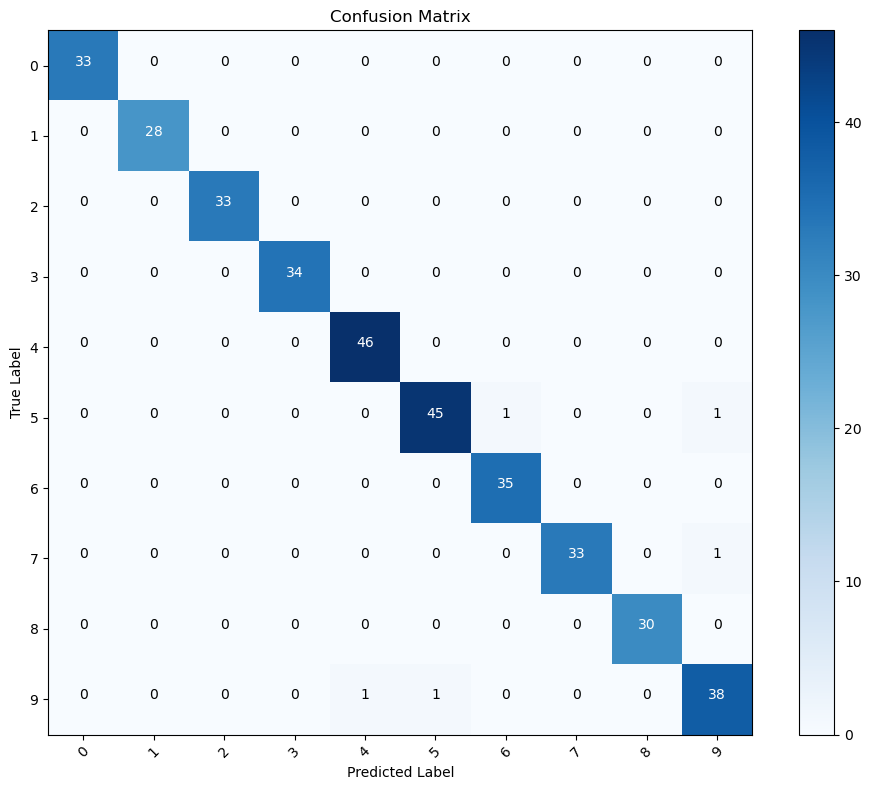

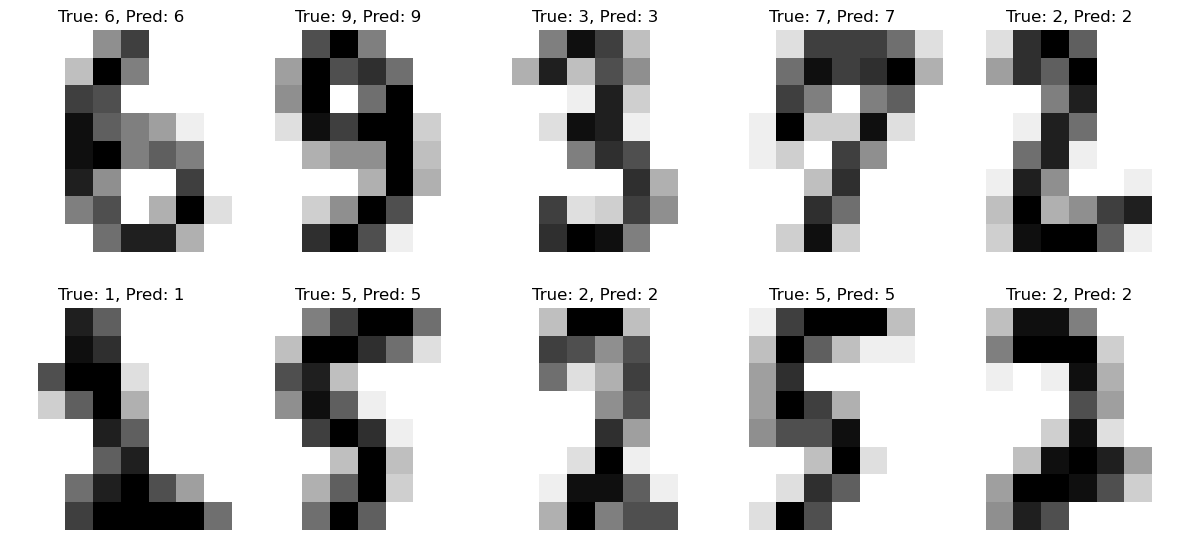

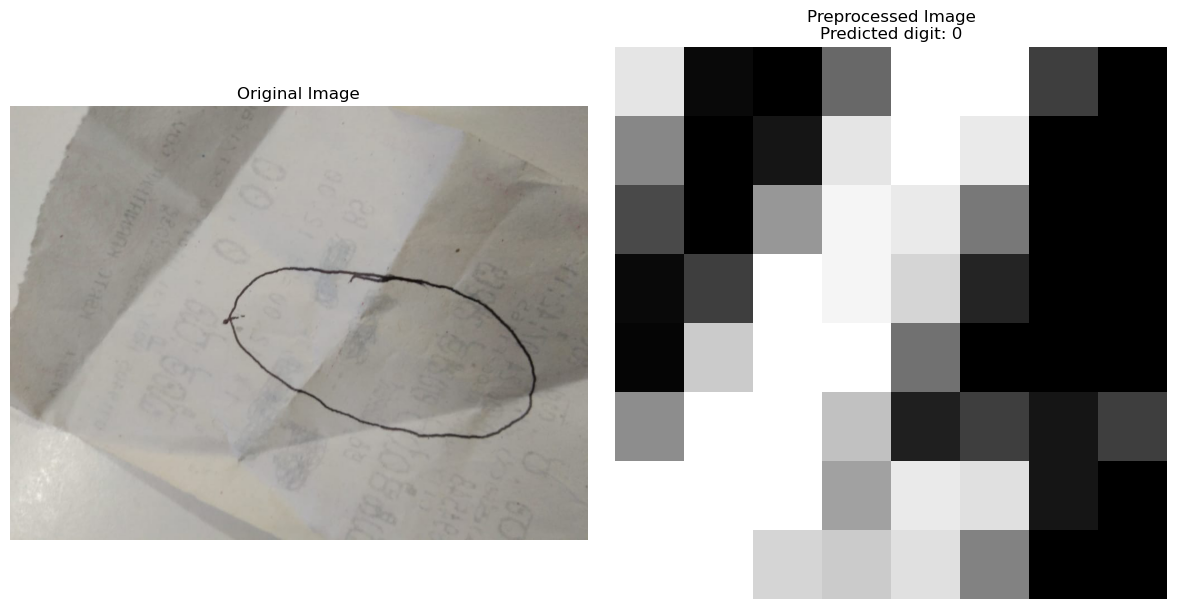

The predicted digit is: 0


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image
import cv2

# Load the MNIST dataset
digits = load_digits()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, digits.target_names, rotation=45)
plt.yticks(tick_marks, digits.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Add text annotations to the confusion matrix
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

# Display some example predictions
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='binary')
    ax.set_title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Specify the path to your test image
test_image_path = r'C:\Users\aryah\Downloads\hand1.jpg'

# Load the original image
original_img = Image.open(test_image_path)

# Display the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_img)
plt.title("Original Image")
plt.axis('off')

# Preprocess the image
img = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))  # Resize to 28x28 first
img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
img = cv2.resize(img, (8, 8), interpolation=cv2.INTER_AREA)  # Then resize to 8x8
img_array = img.astype('float32') / 255.0
processed_img = img_array.reshape(1, -1)

# Make a prediction
prediction = knn.predict(processed_img)

# Display the preprocessed image
plt.subplot(1, 2, 2)
plt.imshow(processed_img.reshape(8, 8), cmap='binary')
plt.title(f"Preprocessed Image\nPredicted digit: {prediction[0]}")
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"The predicted digit is: {prediction[0]}")